### Problem Statement
The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
train_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/WNS Analytics/train_LZdllcl.csv'
test_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/WNS Analytics/test_2umaH9m.csv'

In [3]:
train=pd.read_csv(train_data)
test=pd.read_csv(test_data)

In [4]:
train.shape

(54808, 14)

In [5]:
test.shape

(23490, 13)

In [6]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(54808, 15) (23490, 14) (78298, 15)


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
KPIs_met >80%           78298 non-null int64
age                     78298 non-null int64
avg_training_score      78298 non-null int64
awards_won?             78298 non-null int64
department              78298 non-null object
education               74855 non-null object
employee_id             78298 non-null int64
gender                  78298 non-null object
is_promoted             54808 non-null float64
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    72362 non-null float64
recruitment_channel     78298 non-null object
region                  78298 non-null object
source                  78298 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 9.0+ MB


In [8]:
data.apply(lambda x: sum(x.isnull()))

KPIs_met >80%               0
age                         0
avg_training_score          0
awards_won?                 0
department                  0
education                3443
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating     5936
recruitment_channel         0
region                      0
source                      0
dtype: int64

In [9]:
data.apply(lambda x: len(x.unique()))

KPIs_met >80%               2
age                        41
avg_training_score         61
awards_won?                 2
department                  9
education                   4
employee_id             78298
gender                      2
is_promoted                 3
length_of_service          35
no_of_trainings            10
previous_year_rating        6
recruitment_channel         3
region                     34
source                      2
dtype: int64

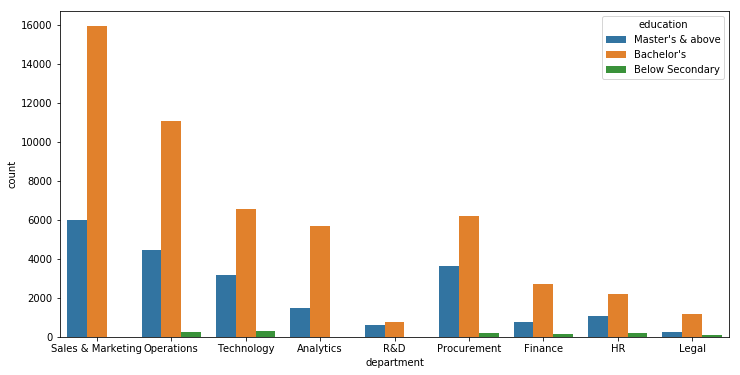

In [8]:
plt.figure(figsize=(12,6))
sb.countplot(x='department', hue='education',data=data)

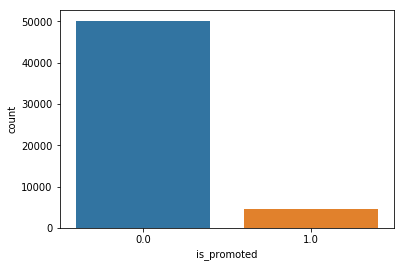

In [100]:
sb.countplot(x='is_promoted',data=data)

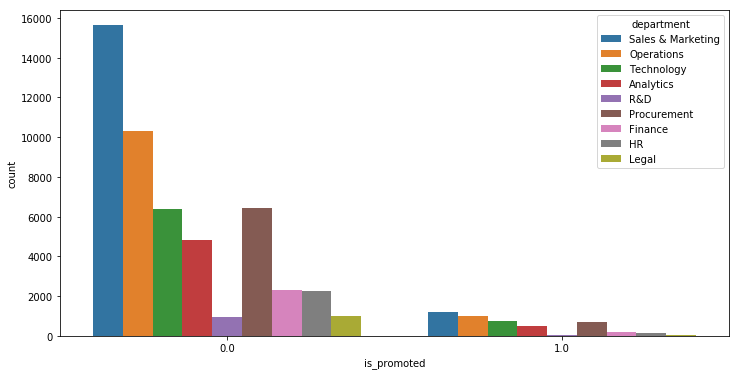

In [101]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='department',data=data)

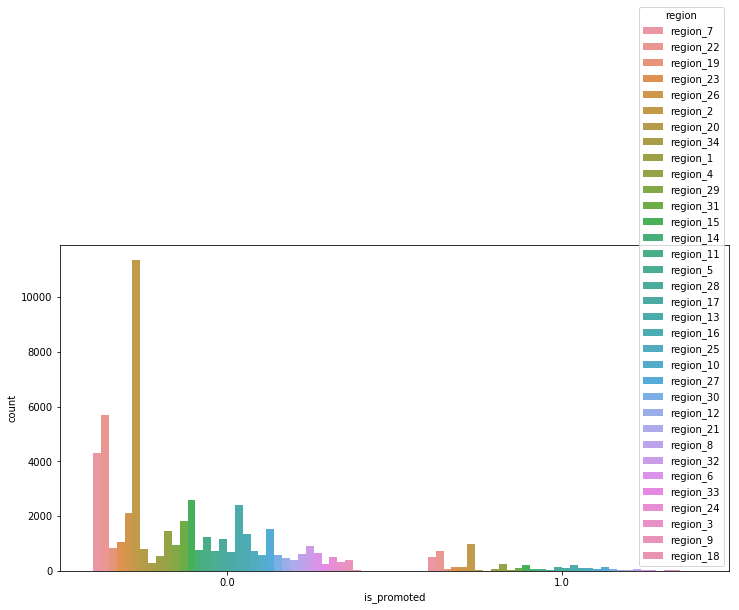

In [17]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='region',data=data)

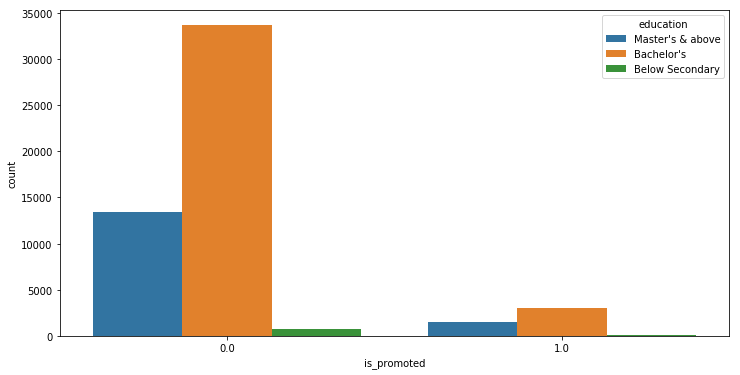

In [102]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='education',data=data)

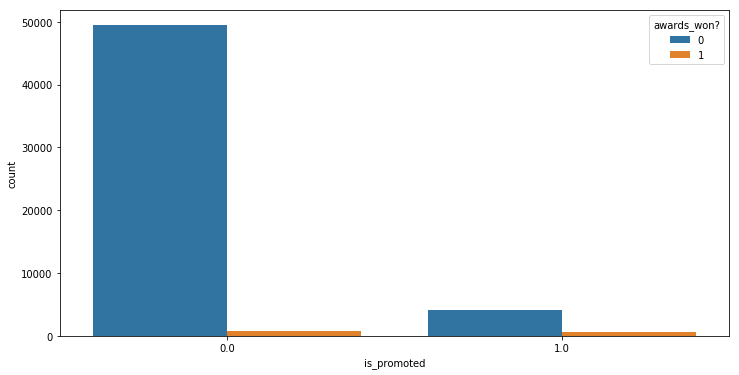

In [103]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='awards_won?',data=data)

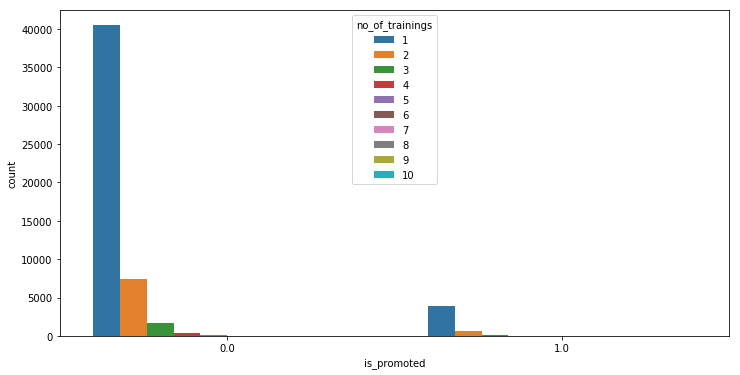

In [104]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='no_of_trainings',data=data)

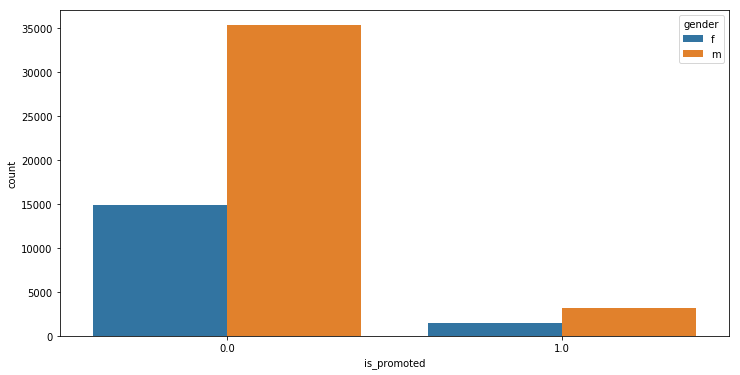

In [105]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='gender',data=data)

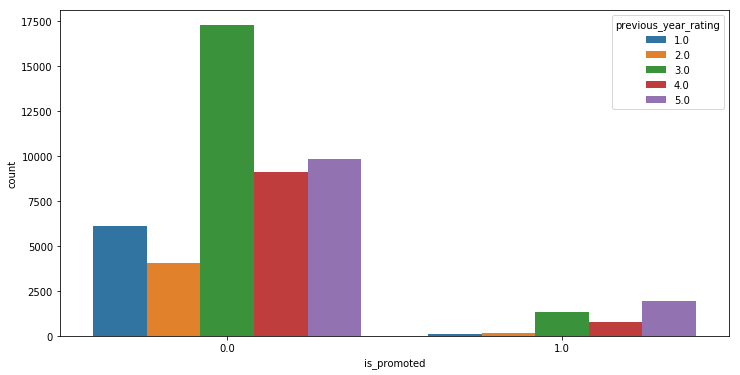

In [106]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='previous_year_rating',data=data)

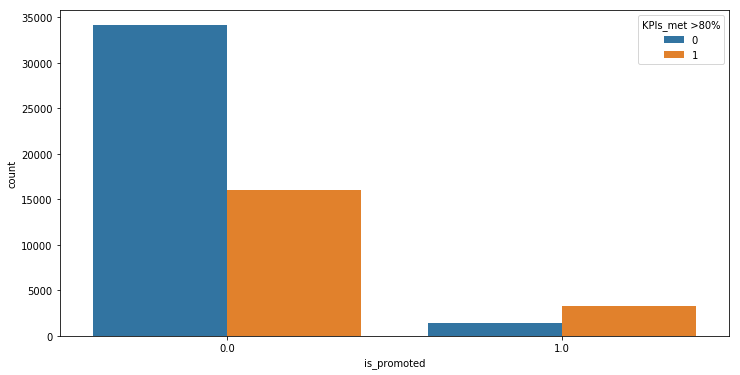

In [107]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='KPIs_met >80%',data=data)

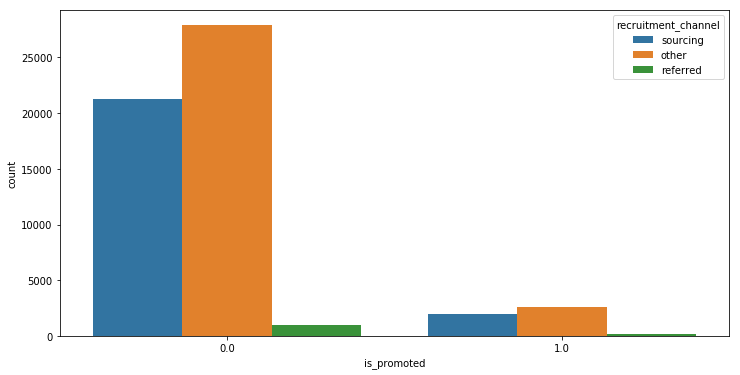

In [108]:
plt.figure(figsize=(12,6))
sb.countplot(x='is_promoted', hue='recruitment_channel',data=data)

C:\Amrendra\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


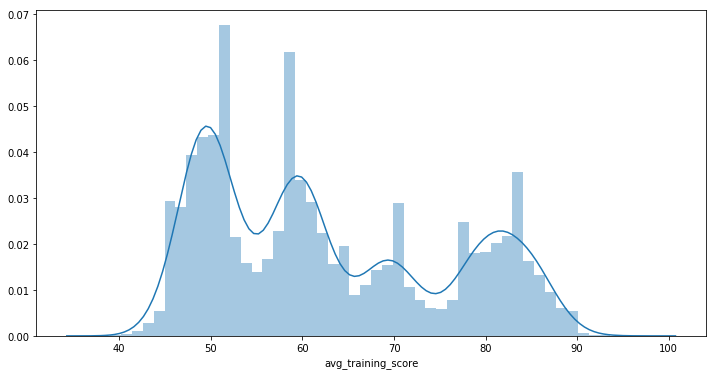

In [30]:
plt.figure(figsize=(12,6))
sb.distplot(data[data.is_promoted==0]['avg_training_score'])

In [162]:
def region_decode(region):
    if(region in ('region_2','region_22','region_7')):
        return 'region_A'
    elif(region in ('region_4','region_13','region_15')):
        return 'region_B'
    elif(region in ('region_28','region_26','region_23','region_27','region_31','region_17','region_25','region_16')):
        return 'region_C'
    else:
        return 'region_D'

In [163]:
data['region']=data['region'].apply(region_decode)

In [164]:
data.previous_year_rating[data.previous_year_rating.isnull()]=3.0

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
data.education[data.education.isnull()]="Bachelor's"

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
def score_trans(score):
    if(score<55):
        return 1
    elif(score>=55 and score<65):
        return 2
    elif(score >=65 and score<75):
        return 3
    elif(score>=75 and score<85):
        return 4
    elif(score>=85 and score<90):
        return 5
    else:
        return 6
    

In [167]:
data.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region,source
0,1,35,49,0,Sales & Marketing,Master's & above,65438,f,0.0,8,1,5.0,sourcing,region_A,train
1,0,30,60,0,Operations,Bachelor's,65141,m,0.0,4,1,5.0,other,region_A,train
2,0,34,50,0,Sales & Marketing,Bachelor's,7513,m,0.0,7,1,3.0,sourcing,region_D,train
3,0,39,50,0,Sales & Marketing,Bachelor's,2542,m,0.0,10,2,1.0,other,region_C,train
4,0,45,73,0,Technology,Bachelor's,48945,m,0.0,2,1,3.0,other,region_C,train


In [168]:
data['avg_training_score']=data['avg_training_score'].apply(score_trans)

In [169]:
def f_trans(col1,col2,col3):
    if(col1==1 or col2==1 or col3==5.0):
        return 1
    else:
        return 0

In [170]:
data['top_performer'] = data.apply(lambda x: f_trans(x['KPIs_met >80%'], x['awards_won?'],x['previous_year_rating']), axis=1)

In [171]:
data=pd.get_dummies(data,columns=['department','education','gender','recruitment_channel','region'])

In [172]:
data.groupby('top_performer').employee_id.count()

top_performer
0    44073
1    34225
Name: employee_id, dtype: int64

In [173]:
data.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,employee_id,is_promoted,length_of_service,no_of_trainings,previous_year_rating,source,...,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,region_region_A,region_region_B,region_region_C,region_region_D
0,1,35,1,0,65438,0.0,8,1,5.0,train,...,1,1,0,0,0,1,1,0,0,0
1,0,30,2,0,65141,0.0,4,1,5.0,train,...,0,0,1,1,0,0,1,0,0,0
2,0,34,1,0,7513,0.0,7,1,3.0,train,...,0,0,1,0,0,1,0,0,0,1
3,0,39,1,0,2542,0.0,10,2,1.0,train,...,0,0,1,1,0,0,0,0,1,0
4,0,45,3,0,48945,0.0,2,1,3.0,train,...,0,0,1,1,0,0,0,0,1,0


In [174]:
train=data[data.source=='train']
train.drop('source',axis=1,inplace=True)
test=data[data.source=='test']
test.drop(['source','is_promoted'],axis=1,inplace=True)

C:\Amrendra\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [175]:
#Define target and ID columns:
target = 'is_promoted'
IDcol = ['employee_id']
from sklearn import model_selection, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 0.2443
CV Score : Mean - 0.2444 | Std - 0.006934 | Min - 0.2316 | Max - 0.2561


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


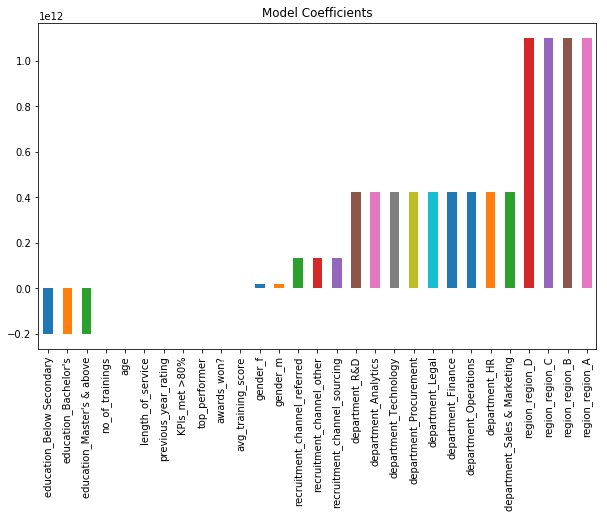

In [176]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(10,6))


Model Report
RMSE : 0.2475
CV Score : Mean - 0.2475 | Std - 0.007567 | Min - 0.2326 | Max - 0.2585


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


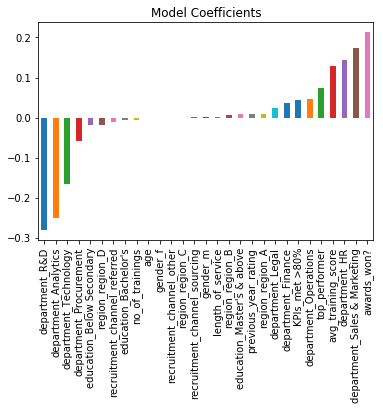

In [177]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 0.2654
CV Score : Mean - 0.2679 | Std - 0.004521 | Min - 0.2626 | Max - 0.2794


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


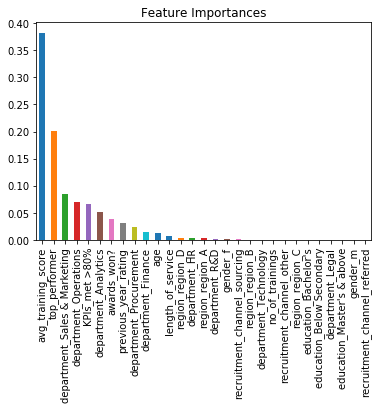

In [193]:
from sklearn.tree import DecisionTreeClassifier
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=60)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [ ]:
##### from sklearn.ensemble import RandomForestClassifier
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestClassifier(n_estimators=200,max_depth=20, min_samples_leaf=60,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 31 columns):
KPIs_met >80%                   54808 non-null int64
age                             54808 non-null int64
avg_training_score              54808 non-null int64
awards_won?                     54808 non-null int64
employee_id                     54808 non-null int64
is_promoted                     54808 non-null float64
length_of_service               54808 non-null int64
no_of_trainings                 54808 non-null int64
previous_year_rating            54808 non-null float64
top_performer                   54808 non-null int64
department_Analytics            54808 non-null uint8
department_Finance              54808 non-null uint8
department_HR                   54808 non-null uint8
department_Legal                54808 non-null uint8
department_Operations           54808 non-null uint8
department_Procurement          54808 non-null uint8
department_R&D                  54808 n


Model Report
RMSE : 0.2749
CV Score : Mean - 0.2754 | Std - 0.003158 | Min - 0.2681 | Max - 0.2801


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


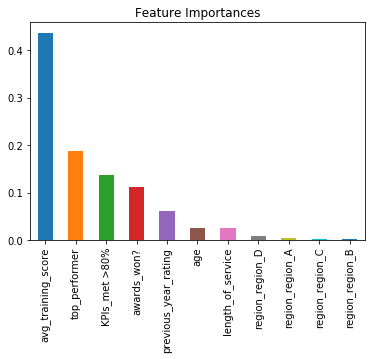

In [202]:
from sklearn.ensemble import RandomForestClassifier
predictors = ['avg_training_score','KPIs_met >80%','awards_won?','previous_year_rating','age','top_performer','length_of_service','region_region_A','region_region_B','region_region_C','region_region_D']
alg5 = RandomForestClassifier(n_estimators=200,max_depth=10, min_samples_leaf=50,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')                                                                      